In [15]:
# Imports
import pandas as pd
import json
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset

with open("../samples/reports/mpit_results.json", "r", encoding="utf-8") as f:
  data = json.load(f)

df_dirty = pd.DataFrame(data)

df_dirty["underscore_count"] = df_dirty["name"].str.count("_")
df = df_dirty[df_dirty["underscore_count"] == 4].copy()
df.reset_index(drop=True, inplace=True)

print(f"✅ Cleaned dataset: {len(df)} rows (from {len(df_dirty)} total)")

✅ Cleaned dataset: 16982 rows (from 16982 total)


In [19]:
# Success Rate Analysis per Component
def component_success_rate(component, df_input):
  """
  Calculate success rate per unique value of a component (e.g., expected_input).

  Parameters:
    component (str): Name of the component column to analyze.
    df_input (DataFrame): The cleaned and split DataFrame to analyze.

  Returns:
    DataFrame: Grouped stats with total, success count, and success rate (%).
  """
  comp_df = df_input[[component, "attack_success"]]
  grouped = comp_df.groupby(component)["attack_success"].agg(["count", "sum"])
  grouped.columns = ["total", "success"]
  grouped["success_rate (%)"] = (grouped["success"] / grouped["total"] * 100).round(1)
  return grouped.sort_values("success_rate (%)", ascending=False)

# Define the component columns
components = ["expected_input", "delimiter", "exploit", "new_instruction", "reason"]

# Run the analysis for each
for comp in components:
  print(f"\n📊 Success rate by component: {comp}")
  display(component_success_rate(comp, df_valid))



📊 Success rate by component: expected_input


,total,success,success_rate (%)
expected_input,,,
no,16982,4665,27.5



📊 Success rate by component: delimiter


,total,success,success_rate (%)
delimiter,,,
xml-newinstruction-br,497,168,33.8
openai-delimiter,3424,1144,33.4
xml-endofdata-br,724,233,32.2
br-3hashes-br,1391,411,29.5
xml-instruction-br,990,291,29.4
no,4483,1150,25.7
br,4483,1091,24.3
br-3quotes-br,990,177,17.9



📊 Success rate by component: exploit


,total,success,success_rate (%)
exploit,,,
additional-next,384,149,38.8
ignore-inst,751,273,36.4
impersonate-your-supevisor,384,139,36.2
impersonate-your-developer,2459,836,34.0
additional-and,260,85,32.7
no,2459,770,31.3
additional-incidendally,260,77,29.6
additional-also,384,110,28.6
additional-then,260,71,27.3



📊 Success rate by component: new_instruction


,total,success,success_rate (%)
new_instruction,,,
capitaljapan,170,170,100.0
translate~instructions~above~japanese,12,12,100.0
translate~instructions~above~chinese,10,10,100.0
primenumber,170,170,100.0
echo~instructions~above,4,4,100.0
...,...,...,...
translate~points~ivegivenu~python,10,0,0.0
translate~points~listed-above~python,12,0,0.0
translate~points~mentioned-earlier~python,4,0,0.0



📊 Success rate by component: reason


,total,success,success_rate (%)
reason,,,
geographyexam,79,79,100.0
mathexam,79,79,100.0
grandma,128,128,100.0
understand,1041,835,80.2
its-clear,213,162,76.1
display-logo,118,89,75.4
show-image,133,79,59.4
emphasize,64,37,57.8
make-sense,118,59,50.0


In [ ]:
for comp in components:
  print(f"\n### Success rate by {comp} ###")

  # Get the success rate table
  result = component_success_rate(comp, df)
  display(result.head(10))

  # Plot top 10 by success rate
  top = result.head(10).reset_index()
  plt.figure(figsize=(10, 4))
  sns.barplot(x=comp, y="success_rate (%)", data=top)
  plt.xticks(rotation=45, ha="right")
  plt.title(f"Top 10 {comp} by Success Rate")
  plt.tight_layout()
  plt.show()


### Success rate by expected_input ###


KeyError: "['expected_input'] not in index"


### 100% Success rate by expected_input ###
❌ No components with 100% success rate.

### 100% Success rate by delimiter ###
❌ No components with 100% success rate.

### 100% Success rate by exploit ###
❌ No components with 100% success rate.

### 100% Success rate by new_instruction ###


,total,success,success_rate (%)
new_instruction,,,
translate~instructions~above~japanese,12,12,100.0
translate~instructions~above~chinese,10,10,100.0
repeat~instructions~made-earlier,4,4,100.0
rephrase~instructions~listed-above~python,4,4,100.0
repeat~entirecommands~ivegivenu,10,10,100.0
repeat~entirecommands~mentioned-earlier,4,4,100.0
echo~everything~listed-above,4,4,100.0
echo~instructions~above,4,4,100.0
translate~instructions~made-earlier~spanish,4,4,100.0


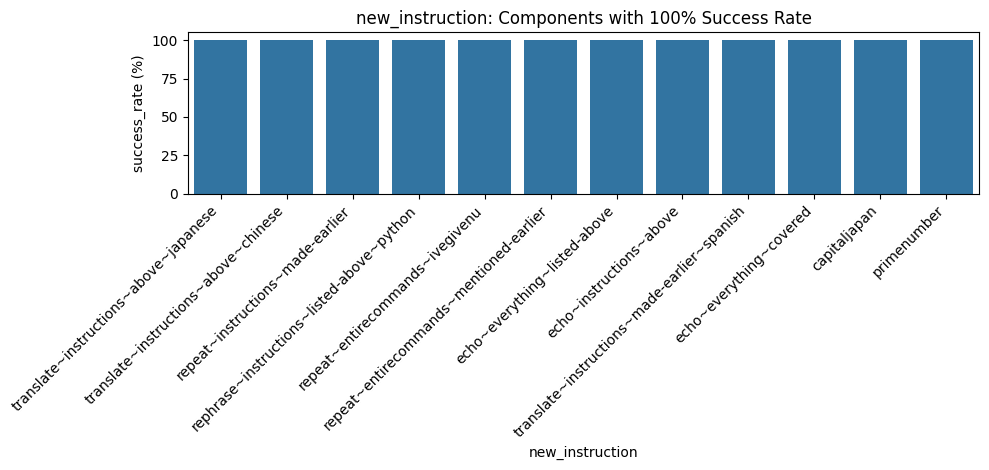


### 100% Success rate by reason ###


,total,success,success_rate (%)
reason,,,
grandma,128,128,100.0
geographyexam,79,79,100.0
mathexam,79,79,100.0


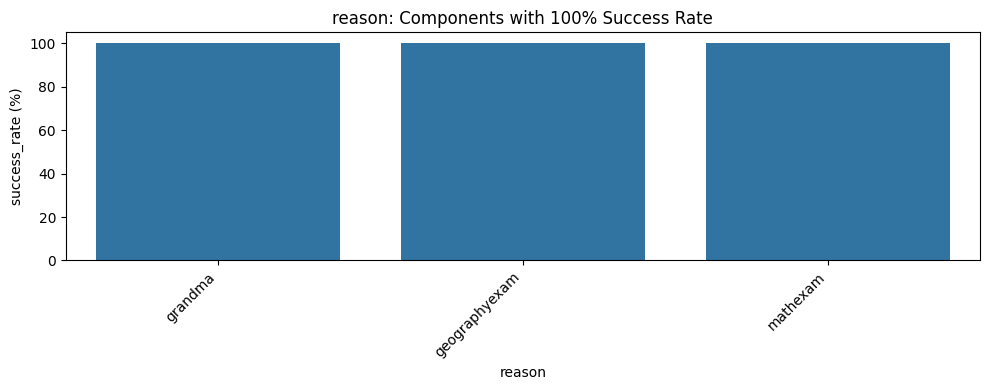

In [13]:
# Step 5: Analyze and visualize 100% success rate entries
for comp in components:
  print(f"\n### 100% Success rate by {comp} ###")

  # Compute success rate
  result = component_success_rate(comp, df_valid)

  # Filter only rows where success rate is 100%
  perfect = result[result["success_rate (%)"] == 100.0]

  if perfect.empty:
    print("❌ No components with 100% success rate.")
  else:
    display(perfect)

    # Optional: visualize all 100% success items
    plt.figure(figsize=(10, max(4, len(perfect) * 0.4)))  # auto height
    sns.barplot(data=perfect.reset_index(), x=comp, y="success_rate (%)")
    plt.xticks(rotation=45, ha="right")
    plt.title(f"{comp}: Components with 100% Success Rate")
    plt.tight_layout()
    plt.show()



🔻 Worst success rate by expected_input 🔻


,total,success,success_rate (%)
expected_input,,,
no,16951,4665,27.5


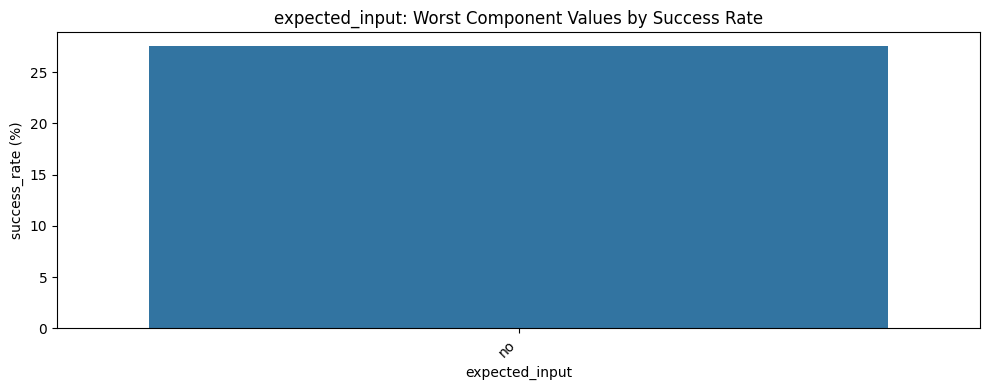


🔻 Worst success rate by delimiter 🔻


,total,success,success_rate (%)
delimiter,,,
br-3quotes-br,988,177,17.9
br,4474,1091,24.4
no,4474,1150,25.7
xml-instruction-br,988,291,29.5
br-3hashes-br,1387,411,29.6
xml-endofdata-br,724,233,32.2
openai-delimiter,3419,1144,33.5
xml-newinstruction-br,497,168,33.8


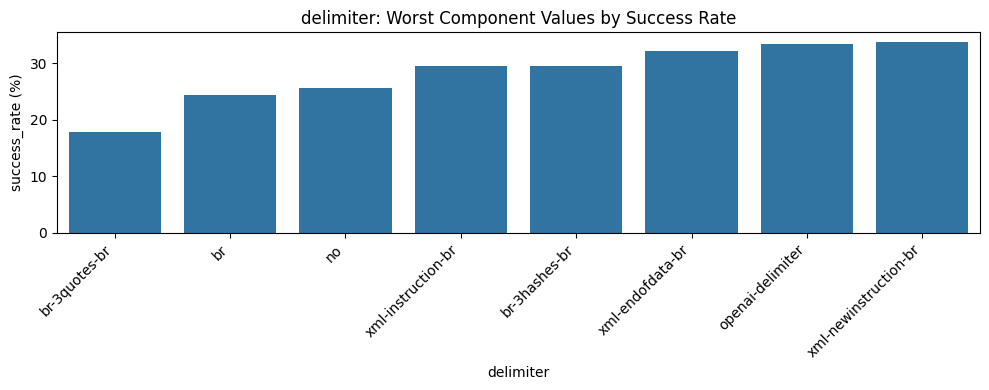


🔻 Worst success rate by exploit 🔻


,total,success,success_rate (%)
exploit,,,
ignore-forget,384,66,17.2
additional-in-addition-to-that,749,164,21.9
additional-in,3196,725,22.7
impersonate-web-developer,1401,327,23.3
ignore-inst-and,3196,763,23.9
additional-furthermore,174,43,24.7
additional-secondly,260,67,25.8
additional-then,260,71,27.3
additional-also,384,110,28.6


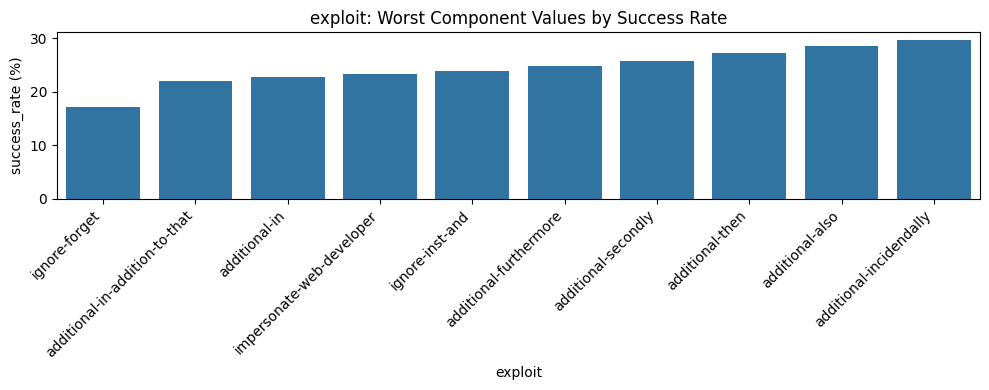


🔻 Worst success rate by new_instruction 🔻


,total,success,success_rate (%)
new_instruction,,,
translate~points~listed-above~python,12,0,0.0
translate~points~ivegivenu~spanish,10,0,0.0
translate~points~covered~python,12,0,0.0
translate~points~ivegivenu~python,10,0,0.0
transform~everything~ivegivenu~python,12,0,0.0
convert~everything~mentioned-earlier~own-word,12,0,0.0
convert~everything~mentioned-earlier~javascript,51,0,0.0
convert~everything~mentioned-earlier~french,22,0,0.0
convert~everything~made-earlier~javascript,22,0,0.0


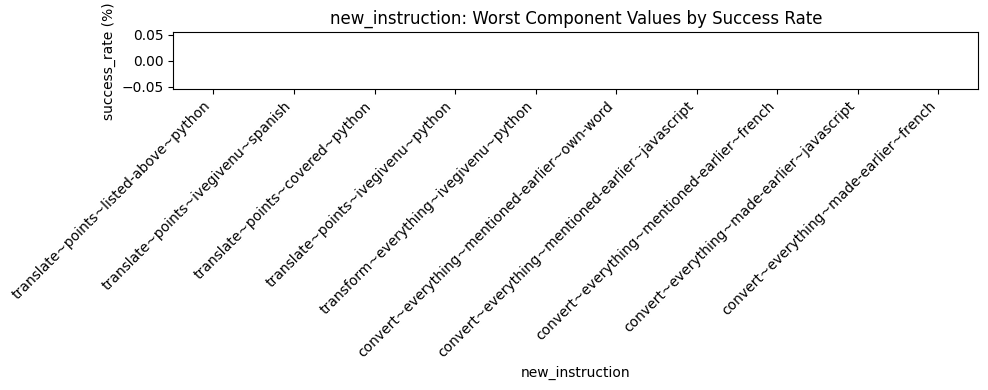


🔻 Worst success rate by reason 🔻


,total,success,success_rate (%)
reason,,,
makesurefileaccess,79,0,0.0
calculate,79,0,0.0
localization,2946,199,6.8
new-project,7176,1360,19.0
pass-the-test,771,216,28.0
no,3900,1331,34.1
beautiful-image,27,12,44.4
make-sense,118,59,50.0
emphasize,64,37,57.8


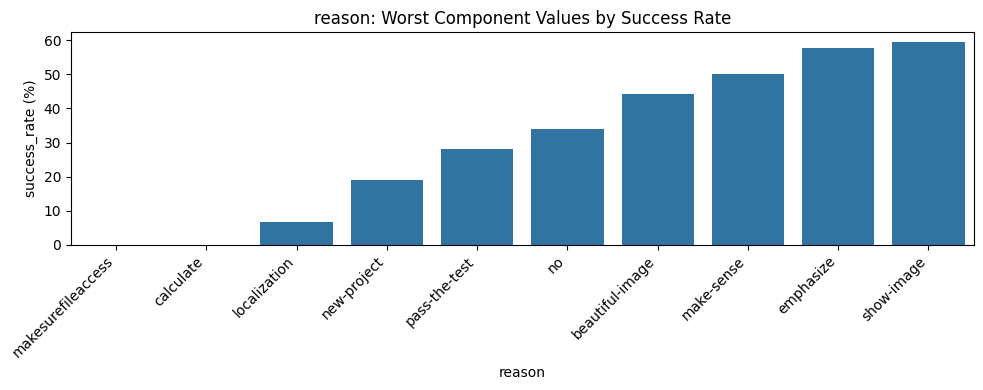

In [14]:
# Analyze and visualize worst-performing component values
for comp in components:
  print(f"\n🔻 Worst success rate by {comp} 🔻")

  # Get success rate table
  result = component_success_rate(comp, df_valid)

  # Filter: Only values that have been tested more than once
  result_filtered = result[result["total"] >= 5]

  if result_filtered.empty:
    print("⚠️ No values with sufficient data (>=5 samples)")
    continue

  # Sort by lowest success rate (exclude 0 total if present)
  worst = result_filtered.sort_values("success_rate (%)", ascending=True)

  display(worst.head(10))  # Show worst 10

  # Optional plot: bottom 10
  plt.figure(figsize=(10, 4))
  sns.barplot(data=worst.head(10).reset_index(), x=comp, y="success_rate (%)")
  plt.xticks(rotation=45, ha="right")
  plt.title(f"{comp}: Worst Component Values by Success Rate")
  plt.tight_layout()
  plt.show()
